# 5- Sırt Regreyonu / Ridge Regression - Alıştırmalar

## ALIŞTIRMA - 1

### Verisetinin İncelenmesi ve Manipüle Edilmesi

In [1]:
# Gerekli kütüphanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [4]:
df.info() # verisetinin bilgi cıktısını verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# modelyear veriseti bilgisinde int olarak görünüyor, aslında datetime olması gerekir.
df["MODELYEAR"] = pd.to_datetime(df["MODELYEAR"]) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MODELYEAR                 1067 non-null   datetime64[ns]
 1   MAKE                      1067 non-null   object        
 2   MODEL                     1067 non-null   object        
 3   VEHICLECLASS              1067 non-null   object        
 4   ENGINESIZE                1067 non-null   float64       
 5   CYLINDERS                 1067 non-null   int64         
 6   TRANSMISSION              1067 non-null   object        
 7   FUELTYPE                  1067 non-null   object        
 8   FUELCONSUMPTION_CITY      1067 non-null   float64       
 9   FUELCONSUMPTION_HWY       1067 non-null   float64       
 10  FUELCONSUMPTION_COMB      1067 non-null   float64       
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64         
 12  CO2EMISSIONS        

In [7]:
df.describe() # degiskenlerin istatistiksel degerleri

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon durumu

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


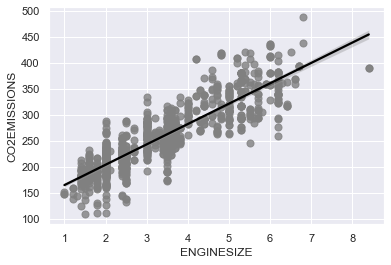

In [9]:
# enginesize ve co2emission görsel durumu
sns.set_theme(color_codes = True)
sns.regplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'black', scatter_kws = {'s': 50, 'color' : 'gray'});

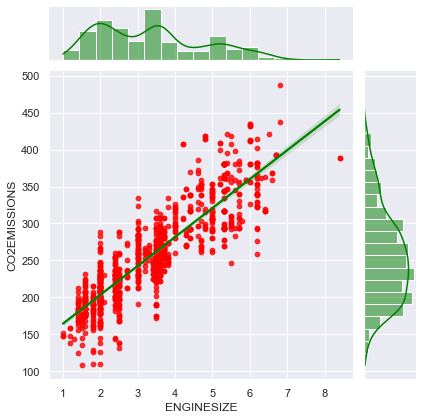

In [10]:
sns.jointplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', kind = 'reg', color = 'green', scatter_kws = {'color': 'red', 's':22});

### Model Kurulumu

In [11]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']] # sürekli degiskenler
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


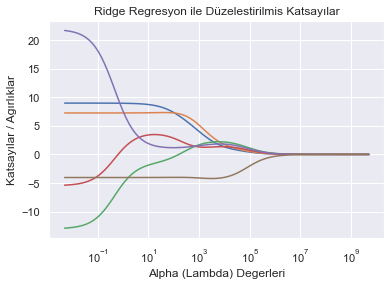

In [12]:
X = df1.drop('CO2EMISSIONS', axis = 1) # bagımsız degiskenler (co2emissions haric)
y = df1['CO2EMISSIONS'] # bagımlı degisken

# %80 egitim, %20 test seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20, 
                                                    random_state = 42)

alpha_degerleri = 10 ** np.linspace(-2, 10, 100) * 0.5 # random alpha degerleri

katsayilar = []

model = Ridge() # model nesnesinin olusturulması ve fit edilmesi

for i in alpha_degerleri:
    model.set_params(alpha = i)
    model.fit(X_train, y_train)
    katsayilar.append(model.coef_)
    
# Katsayı degerlerin görsellestirilmesi,
ax = plt.gca()
ax.plot(alpha_degerleri, katsayilar)
ax.set_xscale('log')

plt.xlabel('Alpha (Lambda) Degerleri')
plt.ylabel('Katsayılar / Agırlıklar')
plt.title('Ridge Regresyon ile Düzelestirilmis Katsayılar');

In [13]:
model.coef_

array([ 1.32978850e-05,  1.65376494e-05,  3.93274320e-05,  2.57845256e-05,
        3.32298926e-05, -7.12485388e-05])

* Katsayılar 0'a yaklasır, 0 olmaz!

In [14]:
# Optimum alpha degeri elde edilerek final modelinin olusturulması ve hata degerinin hesaplanması,
rid = RidgeCV(alphas = alpha_degerleri,
                    scoring = 'neg_mean_squared_error',
                    normalize = True).fit(X_train, y_train)

ridge = Ridge(alpha = rid.alpha_)
ridgemodel = ridge.fit(X_train, y_train)

y_pred = ridgemodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # hata degeri

rscore = ridgemodel.score(X_train, y_train) # modelin basarı degeri

/home/mrkizmaz/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [15]:
rmse

19.985272655300285

In [16]:
rscore

0.8853597797190174

In [17]:
print(f"Modelin basarı yüzdesi: {rscore * 100}")
print("Ridge modeli elde edilen optiumum hata degeri: {0}".format(rmse))

Modelin basarı yüzdesi: 88.53597797190173
Ridge modeli elde edilen optiumum hata degeri: 19.985272655300285


### Sonuç

Ridge Regresyon modeli ile elde edilen degerler,
* Modelin basarı yüzdesi: 88.53597797190173
* Optiumum hata degeri:  **19.985272655300285**

* Aynı veriseti üzerinde,
    * PCR regresyon modelinde optimum hata degeri: **21.51203259544392** olarak bulundu.
    * PLS regresyon modelinde optimum hata degeri: **21.28182557765404** olarak bulundu.